In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Dataset/Soil dataset for new research paper.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Moisture,Temperature,Conductivity,pH,Label
0,31.72,13.45,25.63,54.78,21.34,0.32,6.93,Loamy Soil
1,25.14,18.27,22.17,50.12,19.82,0.34,7.19,Loamy Soil
2,33.89,12.68,27.41,57.45,23.11,0.28,7.37,Loamy Soil
3,37.28,16.92,29.15,59.27,24.87,0.37,6.45,Loamy Soil
4,22.47,11.36,17.84,48.92,16.59,0.22,6.75,Loamy Soil


In [3]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Moisture,Temperature,Conductivity,pH,Label
1999,1.493,1.171,1.542,25.543,29.736,0.471,6.067,Red Soil
2000,1.057,0.948,0.655,23.005,30.168,0.281,6.666,Red Soil
2001,0.736,1.306,0.787,17.947,26.440,0.326,6.330,Red Soil
2002,1.282,0.987,1.079,22.587,32.935,0.299,6.624,Red Soil
2003,0.815,1.147,1.458,26.697,28.607,0.533,6.016,Red Soil


In [4]:
df.head()

,Nitrogen,Phosphorus,Potassium,Moisture,Temperature,Conductivity,pH,Label
0,31.72,13.45,25.63,54.78,21.34,0.32,6.93,Loamy Soil
1,25.14,18.27,22.17,50.12,19.82,0.34,7.19,Loamy Soil
2,33.89,12.68,27.41,57.45,23.11,0.28,7.37,Loamy Soil
3,37.28,16.92,29.15,59.27,24.87,0.37,6.45,Loamy Soil
4,22.47,11.36,17.84,48.92,16.59,0.22,6.75,Loamy Soil


In [5]:
df.info

<bound method DataFrame.info of       Nitrogen  Phosphorus  Potassium  Moisture  Temperature  Conductivity  \
0       31.720      13.450     25.630    54.780       21.340         0.320   
1       25.140      18.270     22.170    50.120       19.820         0.340   
2       33.890      12.680     27.410    57.450       23.110         0.280   
3       37.280      16.920     29.150    59.270       24.870         0.370   
4       22.470      11.360     17.840    48.920       16.590         0.220   
...        ...         ...        ...       ...          ...           ...   
1999     1.493       1.171      1.542    25.543       29.736         0.471   
2000     1.057       0.948      0.655    23.005       30.168         0.281   
2001     0.736       1.306      0.787    17.947       26.440         0.326   
2002     1.282       0.987      1.079    22.587       32.935         0.299   
2003     0.815       1.147      1.458    26.697       28.607         0.533   

         pH       Label  
0    

In [6]:
df.isnull().sum()

Nitrogen        0
Phosphorus      0
Potassium       0
Moisture        0
Temperature     0
Conductivity    0
pH              0
Label           0
dtype: int64

In [7]:
df.shape

(2004, 8)

In [8]:
df.Label.value_counts()

Loamy Soil       501
Alluvial Soil    501
Desert Soil      501
Red Soil         501
Name: Label, dtype: int64

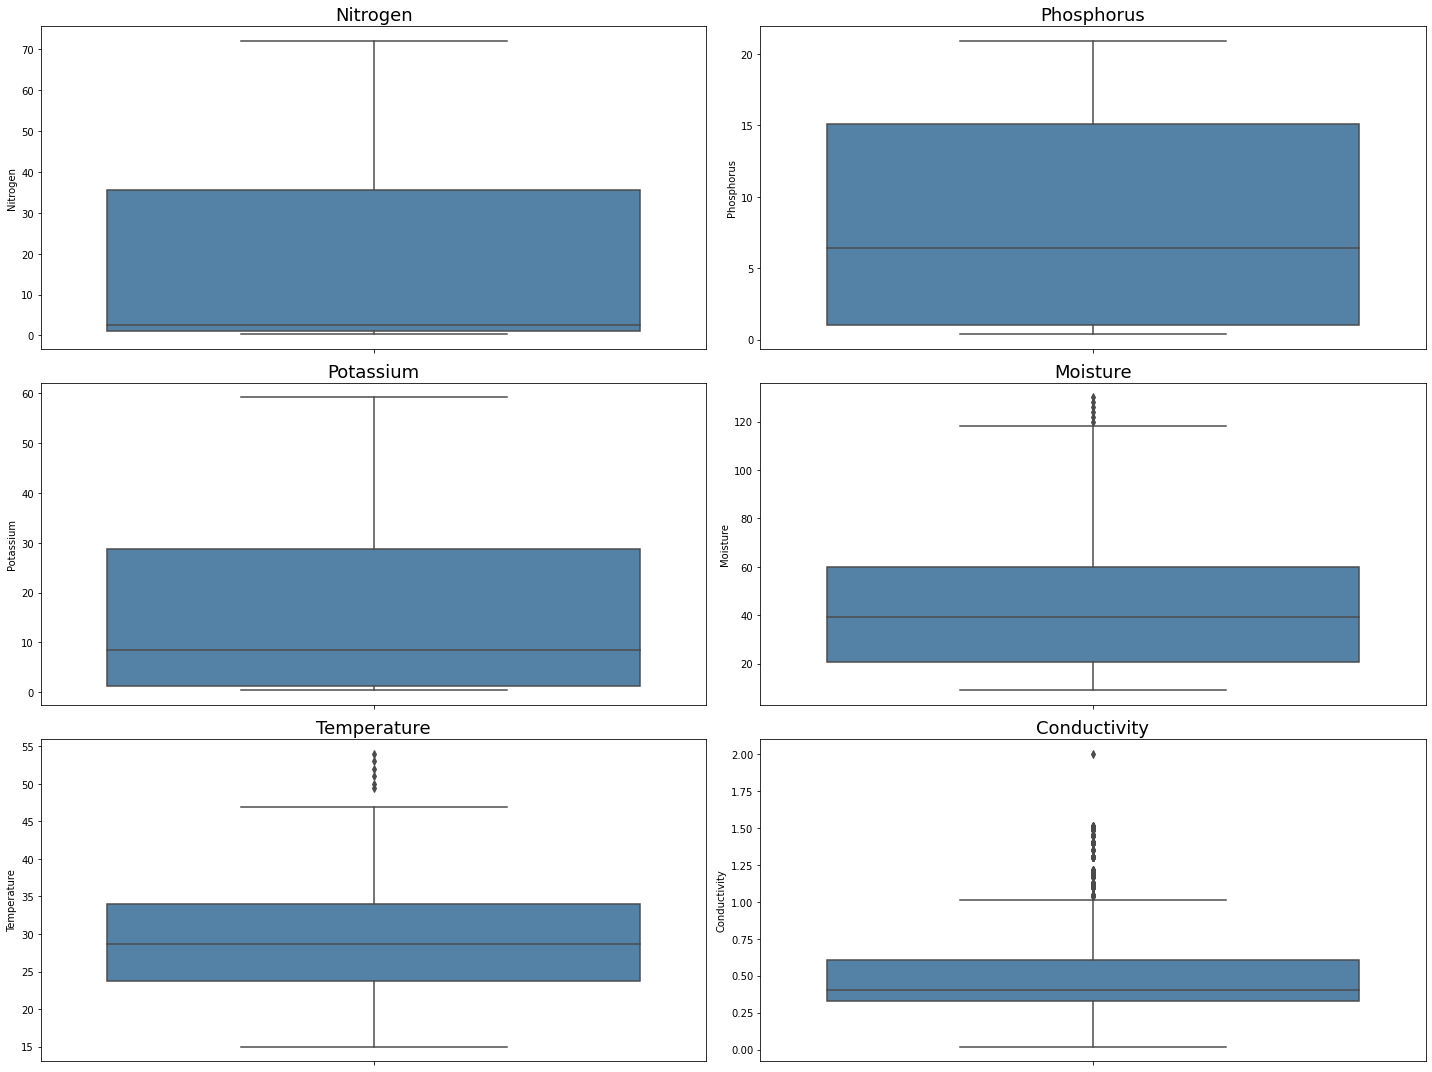

In [9]:
# Plot boxplots for the feature variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), df.columns):
    sns.boxplot(y=df[column], 
                color="#4682B4", 
                ax=ax)
    ax.set_title(f"{column}", fontsize=18)

plt.tight_layout()
plt.show()

In [10]:
df.Conductivity.sort_values().tail()

1290    1.5140
1336    1.5147
1382    1.5147
1428    1.5147
1002    2.0000
Name: Conductivity, dtype: float64

In [11]:
df.Temperature.sort_values().tail()

848    50.0
851    51.0
854    52.0
857    53.0
860    54.0
Name: Temperature, dtype: float64

In [12]:
df = df.drop(df.index[df.Conductivity == 2.0000])
df = df.drop(df.index[df.Conductivity == 1.514])
df = df.drop(df.index[df.Temperature == 54.0])
df = df.drop(df.index[df.Temperature == 53.0])
df = df.drop(df.index[df.Temperature == 52.0])

df.Conductivity.sort_values().tail()

1234    1.5000
1162    1.5000
1428    1.5147
1336    1.5147
1382    1.5147
Name: Conductivity, dtype: float64

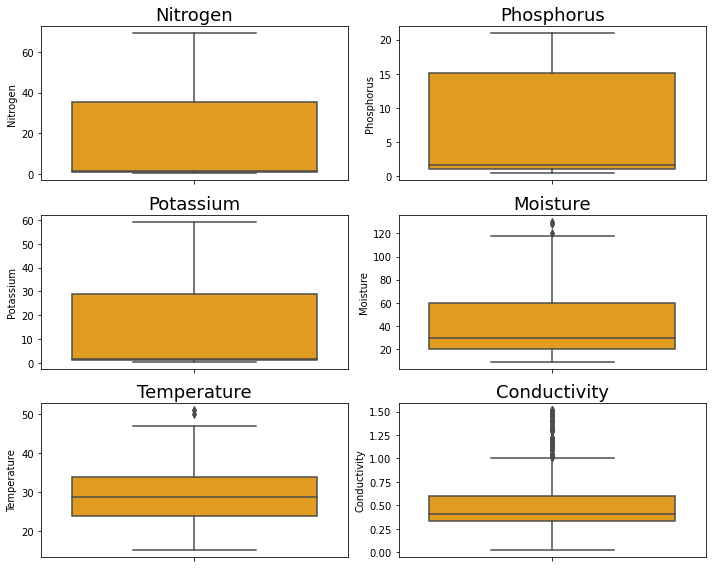

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

for ax, column in zip(axes.flatten(), df.columns):
    sns.boxplot(y=df[column], 
                color="orange", 
                ax=ax)
    ax.set_title(f"{column}", fontsize=18)

plt.tight_layout()
plt.savefig("2.png")
plt.show()

In [14]:
# Map RiskLevel to integer values
risk_mapping = {"Alluvial Soil": 0, "Desert Soil": 1, "Loamy Soil": 2, "Red Soil": 3}
df["Label"] = df["Label"].map(risk_mapping)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999 entries, 0 to 2003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nitrogen      1999 non-null   float64
 1   Phosphorus    1999 non-null   float64
 2   Potassium     1999 non-null   float64
 3   Moisture      1999 non-null   float64
 4   Temperature   1999 non-null   float64
 5   Conductivity  1999 non-null   float64
 6   pH            1999 non-null   float64
 7   Label         1999 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 140.6 KB


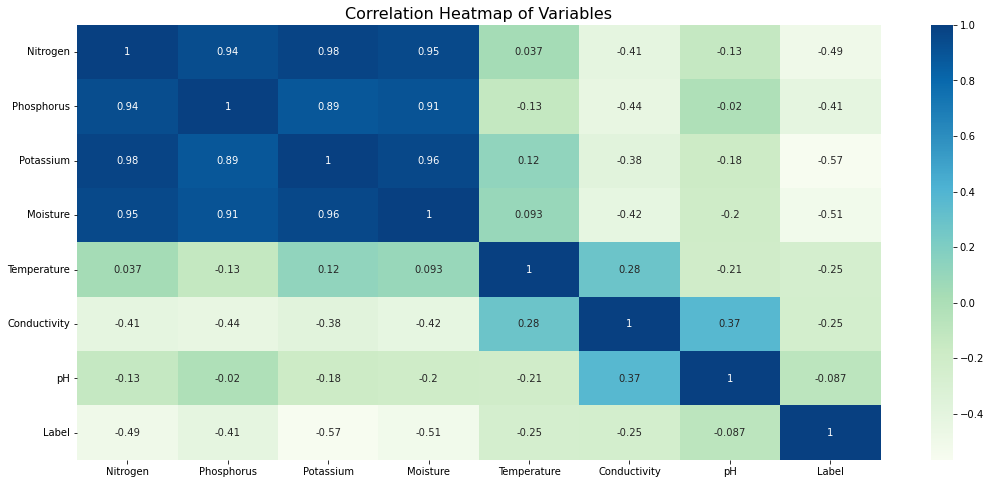

In [36]:
# Create a correlation heatmap
plt.figure(figsize=(18,8))  
sns.heatmap(df.corr(), annot=True, cmap = "GnBu")
plt.title("Correlation Heatmap of Variables", fontsize=16)
plt.show()

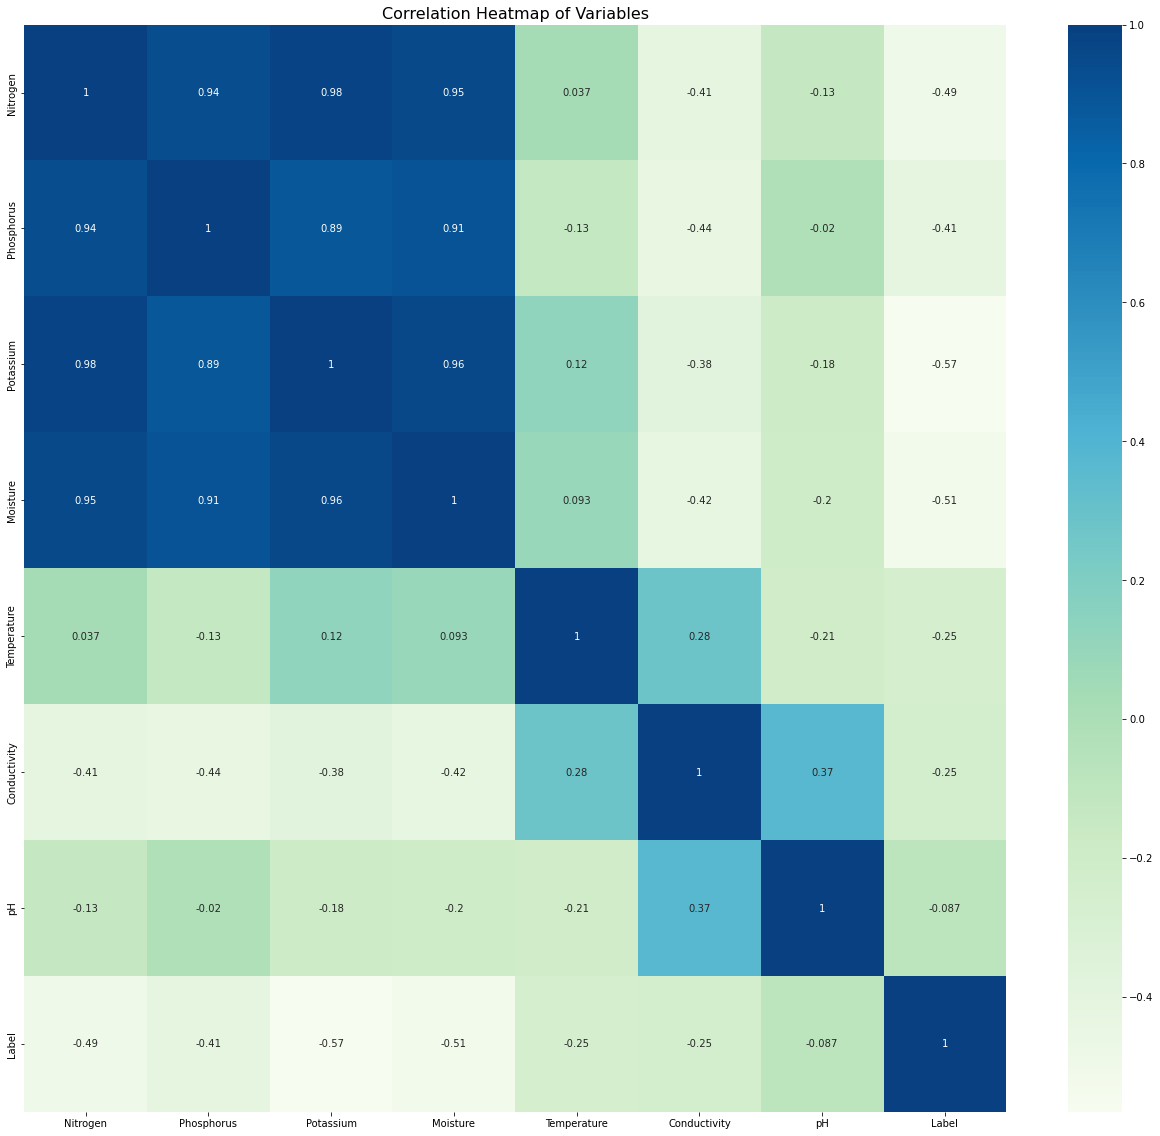

In [26]:
X = df.drop(columns=['Moisture'])
y = df['Moisture']
plt.figure(figsize=(22,20))  
sns.heatmap(df.corr(), annot=True, cmap = "GnBu")
plt.title("Correlation Heatmap of Variables", fontsize=16)
plt.savefig("1.png")
plt.show()

In [ ]:
X = df.drop(columns=['Label'])
y = df['Label']

In [ ]:
df.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle
import joblib

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify = y)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# xgb_classifier = XGBClassifier(random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)
# xgb_classifier.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(rf_classifier.score(X_test, y_test), 3)}")

## Cross Check Our Model

In [ ]:
# Cross validate Random Forest Classifier model
scores_RF = cross_val_score(rf_classifier, X_train, y_train, cv=3, scoring = "accuracy")
print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

In [ ]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 2, 4],
              "n_estimators" :[50,100,200,300,400],
              "max_depth": [None, 10, 20, 30],
              "criterion": ["gini", "entropy"]             
              }

In [ ]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF,
                                cv=3,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [ ]:
GridSearchCV_RF.fit(X_train, y_train);

In [ ]:
print(f"Best estimator for RF model:\n{GridSearchCV_RF.best_estimator_}")
print(f"Best parameter values for RF model:\n{GridSearchCV_RF.best_params_}")
print(f"Best score for RF model: {round(GridSearchCV_RF.best_score_, 3)}")

In [ ]:
# Test with new parameter
random_forest = RandomForestClassifier(criterion="entropy", max_depth=30, min_samples_leaf=2, min_samples_split=6, n_estimators=50, random_state=42)
rf_classifier = random_forest.fit(X_train, y_train)
pred_random_forest = rf_classifier.predict(X_test)

# mse_random_forest = mean_squared_error(y_test, pred_random_forest)
# rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = rf_classifier.score(X_train, y_train)
score_random_forest_test = rf_classifier.score(X_test, y_test)

In [ ]:
# print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
# print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

# -------

In [ ]:
# print(label_encoder.transform(['Alluvial Soil', 'Loamy Soil', 'Red Soil', 'Desert Soil']))

In [ ]:
y_pred = rf_classifier.predict(X_test)
# y_pred = xgb_classifier.predict(X_test)

In [ ]:
y_pred_original = label_encoder.inverse_transform(y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
input_values = np.array([[31, 13, 25, 54, 21, 0.32, 6.9]])
predicted_labels = rf_classifier.predict(input_values)
# input_values = np.array([[15, 15, 15, 45, 15, 0.3, 7.88]])
# predicted_labels = xgb_classifier.predict(input_values)

predicted_soil_name = label_encoder.inverse_transform(predicted_labels)
print(f'Predicted soil name: {predicted_soil_name}')

In [ ]:
feature_importances = rf_classifier.feature_importances_
# feature_importances = xgb_classifier.feature_importances_
print(f'Feature Importances: {feature_importances}')

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X, y_encoded, cv=5)
# scores = cross_val_score(xgb_classifier, X, y_encoded, cv=5)
print(f'Cross-Validation Scores: {scores}')

In [ ]:
# joblib.dump(rf_classifier, '../SavedModels/new-4-soils.joblib')